### Predictive Modelling of Coronary Artery Disease and

  ### Hypertension using Machine Learning

# --------------------------------------------------------------------

##### Name :- Maitreya Govind Lavalekar
##### Student Number :- x23209976
##### Course :- Msc Data Analytics (MSCDAD_JAN24A_O)

# ---------------------------------------------------------------------

######  The purpose of this study is to establish models to predict coronary artery disease and hypertension for machine learning

# ---------------------------------------------------------------------

##### Lets Start with Installing Necesary Libraries 

In [5]:
# pip install pandas numpy scikit-learn plotly

In [6]:
# pip install scipy

In [7]:
# pip install shap 
#!pip install ctgan
#!pip install joblib

##### Importing necessary libraries 

In [8]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency
from ctgan import CTGAN

# -------------------------------------------------------------------

##### So ,in next step we will load dataset 

In [9]:
CDHT=pd.read_csv('heart_attack_prediction_dataset.csv')

##### checking head and tail of dataset for assuring all data are loaded or not .


In [10]:
CDHT.head(5)

Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  \
0    BMW7812   67    Male          208         158/88          72         0   
1    CZE1114   21    Male          389         165/93          98         1   
2    BNI9906   21  Female          324         174/99          72         1   
3    JLN3497   84    Male          383        163/100          73         1   
4    GFO8847   66    Male          318          91/88          93         1   

   Family History  Smoking  Obesity  ...  Sedentary Hours Per Day  Income  \
0               0        1        0  ...                 6.615001  261404   
1               1        1        1  ...                 4.963459  285768   
2               0        0        0  ...                 9.463426  235282   
3               1        1        0  ...                 7.648981  125640   
4               1        1        1  ...                 1.514821  160555   

         BMI  Triglycerides  Physical Activity Days Per Week  \
0  31.251233            286                                0   
1  27.194973            235                                1   
2  28.176571            587                                4   
3  36.464704            378                                3   
4  21.809144            231                                1   

   Sleep Hours Per Day    Country      Continent           Hemisphere  \
0                    6  Argentina  South America  Southern Hemisphere   
1                    7     Canada  North America  Northern Hemisphere   
2                    4     France         Europe  Northern Hemisphere   
3                    4     Canada  North America  Northern Hemisphere   
4                    5   Thailand           Asia  Northern Hemisphere   

   Heart Attack Risk  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  

[5 rows x 26 columns]

In [11]:
CDHT.tail(5)

Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  \
8758    MSV9918   60    Male          121          94/76          61   
8759    QSV6764   28  Female          120        157/102          73   
8760    XKA5925   47    Male          250         161/75         105   
8761    EPE6801   36    Male          178         119/67          60   
8762    ZWN9666   25  Female          356         138/67          75   

      Diabetes  Family History  Smoking  Obesity  ...  \
8758         1               1        1        0  ...   
8759         1               0        0        1  ...   
8760         0               1        1        1  ...   
8761         1               0        1        0  ...   
8762         1               1        0        0  ...   

      Sedentary Hours Per Day  Income        BMI  Triglycerides  \
8758                10.806373  235420  19.655895             67   
8759                 3.833038  217881  23.993866            617   
8760                 2.375214   36998  35.406146            527   
8761                 0.029104  209943  27.294020            114   
8762                 9.005234  247338  32.914151            180   

      Physical Activity Days Per Week  Sleep Hours Per Day         Country  \
8758                                7                    7        Thailand   
8759                                4                    9          Canada   
8760                                4                    4          Brazil   
8761                                2                    8          Brazil   
8762                                7                    4  United Kingdom   

          Continent           Hemisphere  Heart Attack Risk  
8758           Asia  Northern Hemisphere                  0  
8759  North America  Northern Hemisphere                  0  
8760  South America  Southern Hemisphere                  1  
8761  South America  Southern Hemisphere                  0  
8762         Europe  Northern Hemisphere                  1  

[5 rows x 26 columns]

# --------------------------------------------------------------------

##### Print Data Types of columns 

In [12]:
print(CDHT.dtypes)

Patient ID                          object
Age                                  int64
Sex                                 object
Cholesterol                          int64
Blood Pressure                      object
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                object
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                             object
Continent  

##### Statistical Summarty Of Data Sets 

In [13]:
print(CDHT.describe())

               Age  Cholesterol   Heart Rate     Diabetes  Family History  \
count  8763.000000  8763.000000  8763.000000  8763.000000     8763.000000   
mean     53.707977   259.877211    75.021682     0.652288        0.492982   
std      21.249509    80.863276    20.550948     0.476271        0.499979   
min      18.000000   120.000000    40.000000     0.000000        0.000000   
25%      35.000000   192.000000    57.000000     0.000000        0.000000   
50%      54.000000   259.000000    75.000000     1.000000        0.000000   
75%      72.000000   330.000000    93.000000     1.000000        1.000000   
max      90.000000   400.000000   110.000000     1.000000        1.000000   

           Smoking      Obesity  Alcohol Consumption  Exercise Hours Per Week  \
count  8763.000000  8763.000000          8763.000000              8763.000000   
mean      0.896839     0.501426             0.598083                10.014284   
std       0.304186     0.500026             0.490313           

##### Checking Missing Values in data sets 

In [14]:
total_missing = CDHT.isnull().sum().sum()
print(f"Total missing values in the dataset: {total_missing}")

Total missing values in the dataset: 0


##### Checking Missing Values Column wise 

In [15]:
total_missing = CDHT.isnull().sum()
print(f"Total missing values in the dataset: {total_missing}")

Total missing values in the dataset: Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
d

In [16]:
CDHT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

##### Removing Irrelevant Features 

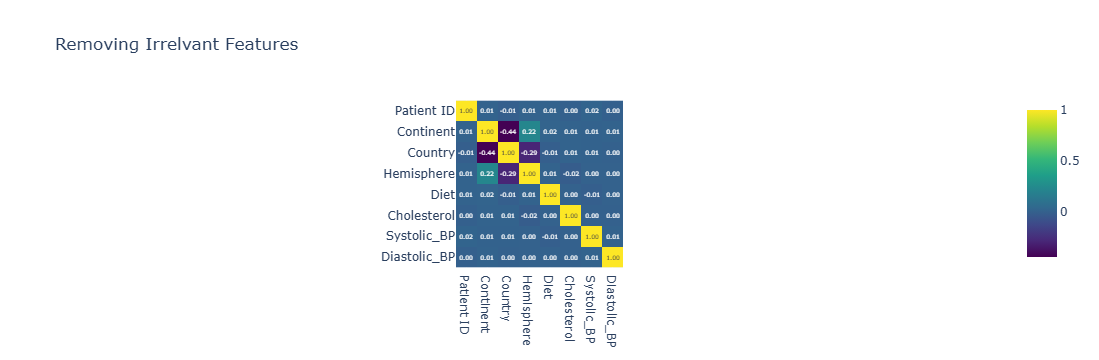

In [37]:
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import LabelEncoder

# Load your dataset
CDHT = pd.read_csv('heart_attack_prediction_dataset.csv')

# List of features to analyze
features_to_analyze = [
    'Patient ID', 'Continent', 'Country', 'Hemisphere', 'Diet', 
    'Cholesterol', 'Blood Pressure'  # Ensure the target variable is included for correlation
]

# Filter the dataset to include only the selected features
subset_data = CDHT[features_to_analyze]

# Preprocess the 'Blood Pressure' column: split into systolic and diastolic
if 'Blood Pressure' in subset_data.columns:
    subset_data[['Systolic_BP', 'Diastolic_BP']] = subset_data['Blood Pressure'].str.split('/', expand=True).astype(float)
    subset_data = subset_data.drop(columns=['Blood Pressure'])  # Drop original column

# Encode non-numeric columns into numeric format
label_encoder = LabelEncoder()

# Columns to encode
columns_to_encode = ['Patient ID', 'Continent', 'Country', 'Hemisphere', 'Diet']

for col in columns_to_encode:
    if col in subset_data.columns:  # Ensure the column exists
        subset_data[col] = label_encoder.fit_transform(subset_data[col].astype(str))

# Calculate the correlation matrix
correlation_matrix = subset_data.corr()

# Plot the heatmap using Plotly Express
fig = px.imshow(
    correlation_matrix,
    x=correlation_matrix.columns,
    y=correlation_matrix.index,
    color_continuous_scale="viridis",  # Use a valid Plotly colorscale
    text_auto=".2f",
    title="Removing Irrelvant Features"
)

# Show the interactive heatmap
fig.show()


##### Checking Unique Value 

In [9]:
unique_counts = CDHT.nunique()
print("Number of unique values in each column:\n", unique_counts)

Number of unique values in each column:
 Patient ID                         8763
Age                                  73
Sex                                   2
Cholesterol                         281
Blood Pressure                     3915
Heart Rate                           71
Diabetes                              2
Family History                        2
Smoking                               2
Obesity                               2
Alcohol Consumption                   2
Exercise Hours Per Week            8763
Diet                                  3
Previous Heart Problems               2
Medication Use                        2
Stress Level                         10
Sedentary Hours Per Day            8763
Income                             8615
BMI                                8763
Triglycerides                       771
Physical Activity Days Per Week       8
Sleep Hours Per Day                   7
Country                              20
Continent                             6

##### Checking Duplicate Rows in DataSets 

In [10]:
count_duplicates = CDHT.duplicated().sum()
print("Number of duplicate rows:", count_duplicates)

Number of duplicate rows: 0


##### Handling categorical data using label encoding and one-hot encoding 

In [11]:
CDHT['Sex'] = CDHT['Sex'].map({'Male': 1, 'Female': 0})

In [15]:
CDHT = pd.get_dummies(CDHT, columns=['Country'], drop_first=True)

###### Removing Irrelavant columns 

In [16]:
columns_to_drop = ['Patient ID', 'Continent', 'Hemisphere', 'Country_Australia', 'Country_Brazil', 
                   'Country_Canada', 'Country_China', 'Country_Colombia', 'Country_France', 
                   'Country_Germany', 'Country_India', 'Country_Italy', 'Country_Japan', 
                   'Country_New Zealand', 'Country_Nigeria', 'Country_South Africa', 
                   'Country_South Korea', 'Country_Spain', 'Country_Thailand', 
                   'Country_United Kingdom', 'Country_United States', 'Country_Vietnam', 'Diet']

CDHT = CDHT.drop(columns=columns_to_drop)

#### ----------------------------------------------------------------------------------------------

# --------------------------------------------------------------------

### Feature Engineering 

######  1. Creating  Hypertension feature


######  Spliting columns 'Blood Pressure' into systolic(greter than or equal to  140 ) and diastolic values( greter than or equal to 90)

In [17]:
CDHT[['Systolic_BP', 'Diastolic_BP']] = CDHT['Blood Pressure'].str.split('/', expand=True).astype(float)

In [18]:
CDHT['HT'] = ((CDHT['Systolic_BP'] >= 140) | (CDHT['Diastolic_BP'] >= 90)).astype(int)

In [19]:
### Suggestion from prof. adding Blood presure column will improve quality of model by reduing complextiy in blood presure 

In [20]:
CDHT['Blood_Pressure_Status'] = CDHT.apply(lambda row: 'High' if (row['Systolic_BP'] >= 140 or row['Diastolic_BP'] >= 90) else 'Low', axis=1)

##### 2. Creating  Coronary Disease feature 

###### First of all we checks if the cholesterol level is greater than or equal to 240 mg/dL for each row in the dataset. High cholesterol (240 or above) is a risk factor for coronary disease.

###### In this dataset, diabetes is represented as 1 for "Yes" and 0 for "No". This condition returns True if the person has diabetes (i.e., Diabetes == 1).

######  a family history of coronary disease, which is also represented as 1 for "Yes" and 0 for "No". It returns True if the person has a family history of coronary disease.

In [21]:
CDHT['CD'] = ((CDHT['Cholesterol'] >= 240) | (CDHT['Diabetes'] == 1) | (CDHT['Family History'] == 1)).astype(int)

In [22]:
print(CDHT[['HT', 'CD']].head(10))

   HT  CD
0   1   0
1   1   1
2   1   1
3   1   1
4   0   1
5   1   1
6   0   1
7   0   0
8   1   1
9   1   1


In [23]:
print(CDHT.head(5))

   Age  Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  Family History  \
0   67    1          208         158/88          72         0               0   
1   21    1          389         165/93          98         1               1   
2   21    0          324         174/99          72         1               0   
3   84    1          383        163/100          73         1               1   
4   66    1          318          91/88          93         1               1   

   Smoking  Obesity  Alcohol Consumption  ...        BMI  Triglycerides  \
0        1        0                    0  ...  31.251233            286   
1        1        1                    1  ...  27.194973            235   
2        0        0                    0  ...  28.176571            587   
3        1        0                    1  ...  36.464704            378   
4        1        1                    0  ...  21.809144            231   

   Physical Activity Days Per Week  Sleep Hours Per Day  Heart

##### Saving  the dataframe CDHT to a CSV file if needed we can use it .

In [24]:
CDHT.to_csv('CDHT_with_HT_CD_features.csv', index=False)
print("File saved as 'CDHT_with_HT_CD_features.csv'")

File saved as 'CDHT_with_HT_CD_features.csv'


######  Checking new features in new file is added or not 

In [25]:
CDHT_NEW=pd.read_csv('CDHT_with_HT_CD_features.csv')

In [26]:
CDHT_NEW.head(5)

Age  Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  Family History  \
0   67    1          208         158/88          72         0               0   
1   21    1          389         165/93          98         1               1   
2   21    0          324         174/99          72         1               0   
3   84    1          383        163/100          73         1               1   
4   66    1          318          91/88          93         1               1   

   Smoking  Obesity  Alcohol Consumption  ...        BMI  Triglycerides  \
0        1        0                    0  ...  31.251233            286   
1        1        1                    1  ...  27.194973            235   
2        0        0                    0  ...  28.176571            587   
3        1        0                    1  ...  36.464704            378   
4        1        1                    0  ...  21.809144            231   

   Physical Activity Days Per Week  Sleep Hours Per Day  Heart Attack Risk  \
0                                0                    6                  0   
1                                1                    7                  0   
2                                4                    4                  0   
3                                3                    4                  0   
4                                1                    5                  0   

   Systolic_BP  Diastolic_BP  HT  Blood_Pressure_Status  CD  
0        158.0          88.0   1                   High   0  
1        165.0          93.0   1                   High   1  
2        174.0          99.0   1                   High   1  
3        163.0         100.0   1                   High   1  
4         91.0          88.0   0                    Low   1  

[5 rows x 26 columns]

######  Statistical summary of new dataset 

In [27]:
print(CDHT_NEW.describe())

               Age          Sex  Cholesterol   Heart Rate     Diabetes  \
count  8763.000000  8763.000000  8763.000000  8763.000000  8763.000000   
mean     53.707977     0.697364   259.877211    75.021682     0.652288   
std      21.249509     0.459425    80.863276    20.550948     0.476271   
min      18.000000     0.000000   120.000000    40.000000     0.000000   
25%      35.000000     0.000000   192.000000    57.000000     0.000000   
50%      54.000000     1.000000   259.000000    75.000000     1.000000   
75%      72.000000     1.000000   330.000000    93.000000     1.000000   
max      90.000000     1.000000   400.000000   110.000000     1.000000   

       Family History      Smoking      Obesity  Alcohol Consumption  \
count     8763.000000  8763.000000  8763.000000          8763.000000   
mean         0.492982     0.896839     0.501426             0.598083   
std          0.499979     0.304186     0.500026             0.490313   
min          0.000000     0.000000     0.0000

###### Checking Missing values 

In [28]:
missing_values=CDHT_NEW.isnull().sum ()
print("Missing values in each column :\n",missing_values)

Missing values in each column :
 Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Heart Attack Risk                  0
Systolic_BP                        0
Diastolic_BP                       0
HT                                 0
Blood_Pressure_Status              0
CD                                 0
dtype

In [29]:
CDHT_NEW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   int64  
 2   Cholesterol                      8763 non-null   int64  
 3   Blood Pressure                   8763 non-null   object 
 4   Heart Rate                       8763 non-null   int64  
 5   Diabetes                         8763 non-null   int64  
 6   Family History                   8763 non-null   int64  
 7   Smoking                          8763 non-null   int64  
 8   Obesity                          8763 non-null   int64  
 9   Alcohol Consumption              8763 non-null   int64  
 10  Exercise Hours Per Week          8763 non-null   float64
 11  Previous Heart Problems          8763 non-null   int64  
 12  Medication Use      

In [30]:
print("Shape of the dataset:", CDHT_NEW.shape)

Shape of the dataset: (8763, 26)


###### Checking duplicate values 

In [31]:
count_duplicates = CDHT_NEW.duplicated().sum()
print("Number of duplicate rows:", count_duplicates)

Number of duplicate rows: 0


###### checking unique values 

In [32]:
unique_counts = CDHT_NEW.nunique()
print("Number of unique values in each column:\n", unique_counts)

Number of unique values in each column:
 Age                                  73
Sex                                   2
Cholesterol                         281
Blood Pressure                     3915
Heart Rate                           71
Diabetes                              2
Family History                        2
Smoking                               2
Obesity                               2
Alcohol Consumption                   2
Exercise Hours Per Week            8763
Previous Heart Problems               2
Medication Use                        2
Stress Level                         10
Sedentary Hours Per Day            8763
Income                             8615
BMI                                8763
Triglycerides                       771
Physical Activity Days Per Week       8
Sleep Hours Per Day                   7
Heart Attack Risk                     2
Systolic_BP                          91
Diastolic_BP                         51
HT                                    2

In [33]:
import pandas as pd
from sklearn.preprocessing import RobustScaler
# Load your dataset
CDHT = pd.read_csv('CDHT_with_HT_CD_features.csv')   
# Step 1: Check if 'Blood_Pressure' column exists and contains values like '158/88'
if 'Blood_Pressure' in CDHT.columns:
    # Split 'Blood_Pressure' column by '/', handling cases where this format exists
    BP_split = CDHT['Blood_Pressure'].str.split('/', expand=True)
    # If split was successful, assign to new columns; else handle errors
    if BP_split.shape[1] == 2:
        CDHT['Systolic_BP'] = pd.to_numeric(BP_split[0], errors='coerce')
        CDHT['Diastolic_BP'] = pd.to_numeric(BP_split[1], errors='coerce')  
        # Drop the original 'Blood_Pressure' column
        CDHT = CDHT.drop(columns=['Blood_Pressure'])
    else:
        print("Warning: 'Blood_Pressure' column format is unexpected and couldn't be split.")
# Step 2: Convert all columns to numeric types where possible, setting errors='coerce' to handle non-numeric values
for col in CDHT.columns:
    CDHT[col] = pd.to_numeric(CDHT[col], errors='coerce')
# Step 3: Check for missing values and print summary before dropping
missing_summary = CDHT.isnull().sum()
#print("Missing values per column before dropping any rows:")
#print(missing_summary)
# Step 4: Drop rows with missing values only if it doesn't remove all data
if CDHT.dropna().shape[0] > 0:
    CDHT = CDHT.dropna()
else:
    print("Warning: Dropping rows with NaN would result in an empty dataset. Consider alternative handling methods.")
# Step 5: Apply RobustScaler to the dataset (only on numeric columns)
scaler = RobustScaler()
numeric_columns = CDHT.select_dtypes(include='number').columns  # Select only numeric columns
CDHT[numeric_columns] = scaler.fit_transform(CDHT[numeric_columns])
# Display the first few rows of the scaled data
print("Scaled data:")
print(CDHT.head())

Scaled data:
        Age  Sex  Cholesterol  Blood Pressure  Heart Rate  Diabetes  \
0  0.351351  0.0    -0.369565             NaN   -0.083333      -1.0   
1 -0.891892  0.0     0.942029             NaN    0.638889       0.0   
2 -0.891892 -1.0     0.471014             NaN   -0.083333       0.0   
3  0.810811  0.0     0.898551             NaN   -0.055556       0.0   
4  0.324324  0.0     0.427536             NaN    0.500000       0.0   

   Family History  Smoking  Obesity  Alcohol Consumption  ...       BMI  \
0             0.0      0.0     -1.0                 -1.0  ...  0.227694   
1             1.0      0.0      0.0                  0.0  ... -0.144385   
2             0.0     -1.0     -1.0                 -1.0  ... -0.054343   
3             1.0      0.0     -1.0                  0.0  ...  0.705924   
4             1.0      0.0      0.0                 -1.0  ... -0.638425   

   Triglycerides  Physical Activity Days Per Week  Sleep Hours Per Day  \
0      -0.338939                   

C:\Users\maitreya\anaconda3\envs\r4-base\Lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,
C:\Users\maitreya\anaconda3\envs\r4-base\Lib\site-packages\numpy\lib\nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


#### Normalization 

# --------------------------------------------------------------------

###### Finding Outliers 

###### 1. Boxplot for Cholesterol

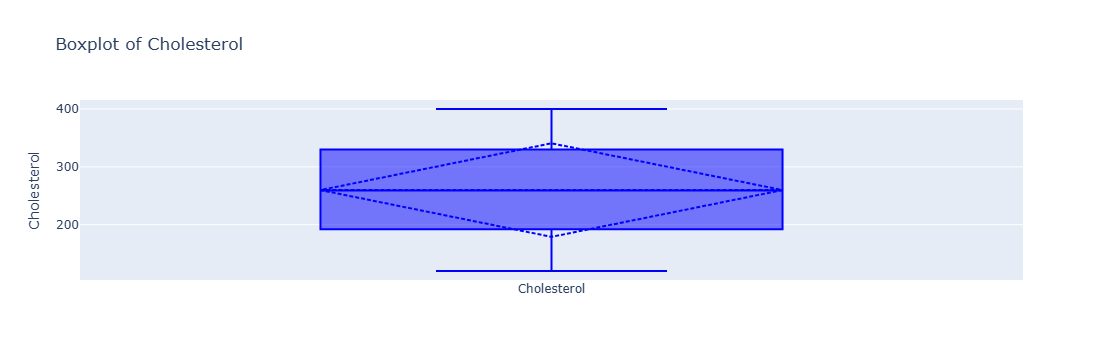

In [34]:
fig = go.Figure()

# Add boxplot to the figure
fig.add_trace(go.Box(y=CDHT_NEW['Cholesterol'], name='Cholesterol', boxmean='sd', marker_color='blue'))

# Set title and labels
fig.update_layout(
    title='Boxplot of Cholesterol',
    yaxis_title='Cholesterol',
    xaxis_title=' ',
    showlegend=False
)

# Show the figure
fig.show()

###### 2. Boxplot for Systolic_BP

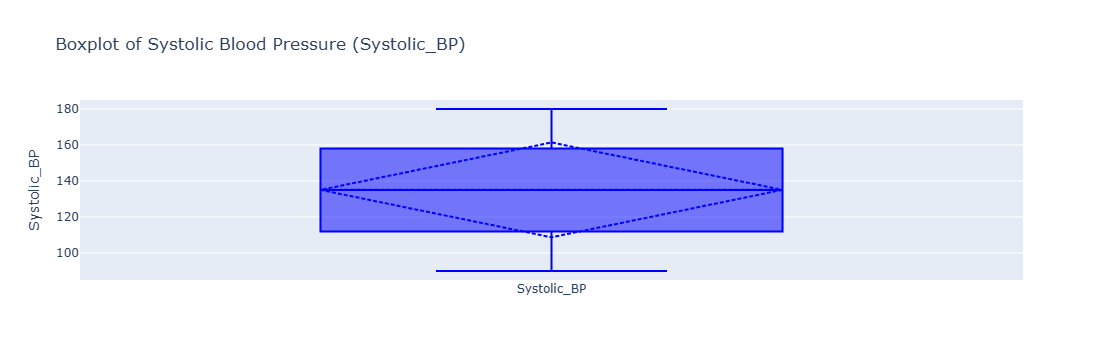

In [35]:
# Boxplot for Systolic_BP
fig = go.Figure()

# Add boxplot to the figure
fig.add_trace(go.Box(y=CDHT_NEW['Systolic_BP'], name='Systolic_BP', boxmean='sd', marker_color='blue'))

# Set title and labels
fig.update_layout(
    title='Boxplot of Systolic Blood Pressure (Systolic_BP)',
    yaxis_title='Systolic_BP',
    xaxis_title=' ',
    showlegend=False
)

# Show the figure
fig.show()

##### 3. Boxplot for Diastolic_BP

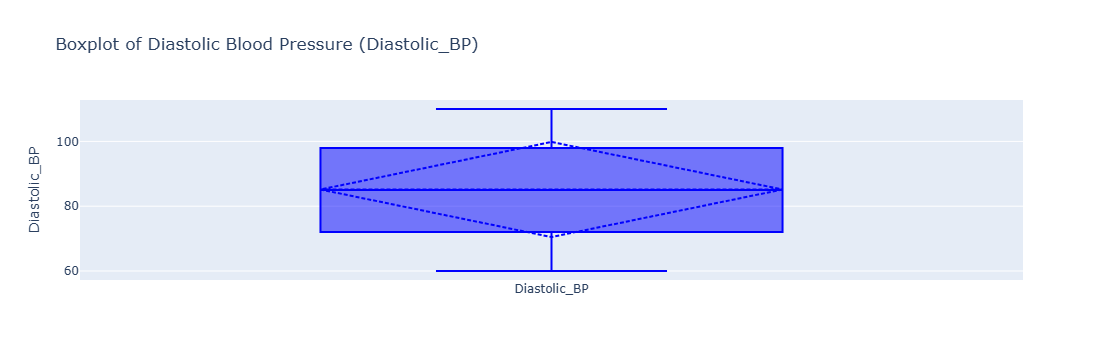

In [36]:
# Boxplot for Diastolic_BP
fig = go.Figure()

# Add boxplot to the figure
fig.add_trace(go.Box(y=CDHT_NEW['Diastolic_BP'], name='Diastolic_BP', boxmean='sd', marker_color='blue'))

# Set title and labels
fig.update_layout(
    title='Boxplot of Diastolic Blood Pressure (Diastolic_BP)',
    yaxis_title='Diastolic_BP',
    xaxis_title=' ',
    showlegend=False
)

# Show the figure
fig.show()

##### 4. Boxplot for Heart Rate

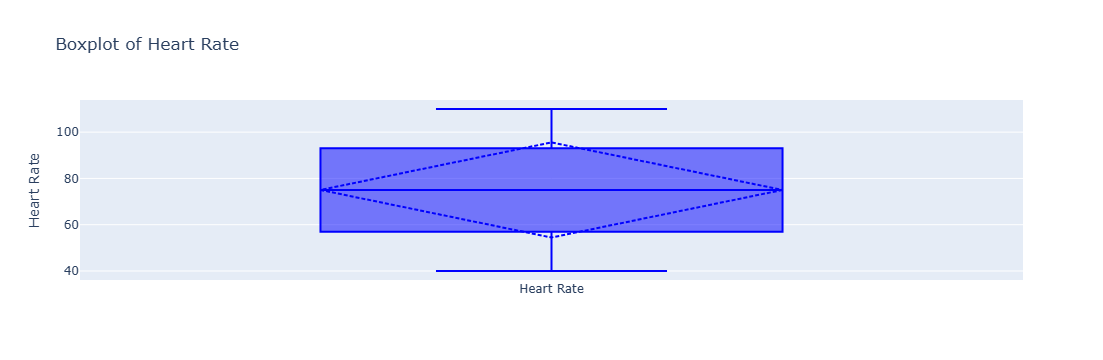

In [37]:
# Boxplot for Heart Rate
fig = go.Figure()

# Add boxplot to the figure
fig.add_trace(go.Box(y=CDHT_NEW['Heart Rate'], name='Heart Rate', boxmean='sd', marker_color='blue'))

# Set title and labels
fig.update_layout(
    title='Boxplot of Heart Rate',
    yaxis_title='Heart Rate',
    xaxis_title=' ',
    showlegend=False
)

# Show the figure
fig.show()

###### 5. Boxplot for BMI

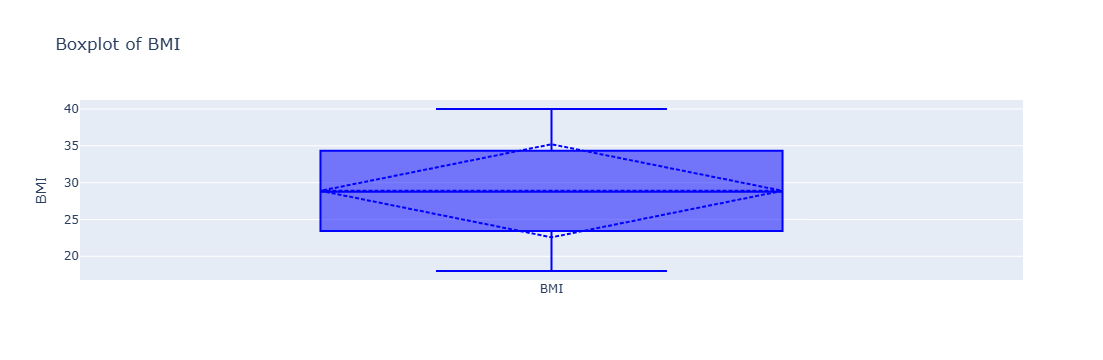

In [38]:
# Boxplot for BMI
fig = go.Figure()

# Add boxplot to the figure
fig.add_trace(go.Box(y=CDHT_NEW['BMI'], name='BMI', boxmean='sd', marker_color='blue'))

# Set title and labels
fig.update_layout(
    title='Boxplot of BMI',
    yaxis_title='BMI',
    xaxis_title=' ',
    showlegend=False
)

# Show the figure
fig.show()

##### 6. Boxplot for Triglycerides

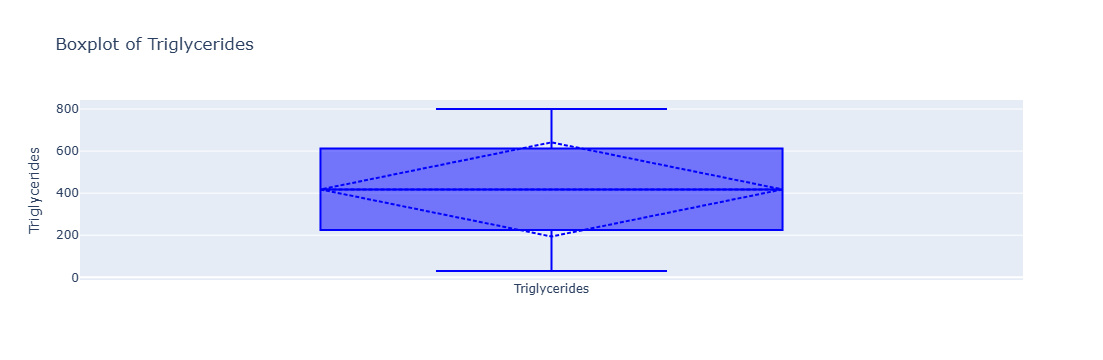

In [39]:
# Boxplot for Triglycerides
fig = go.Figure()

# Add boxplot to the figure
fig.add_trace(go.Box(y=CDHT_NEW['Triglycerides'], name='Triglycerides', boxmean='sd', marker_color='blue'))

# Set title and labels
fig.update_layout(
    title='Boxplot of Triglycerides',
    yaxis_title='Triglycerides',
    xaxis_title=' ',
    showlegend=False
)

# Show the figure
fig.show()

###### Calculate Z-scores for the Triglycerides column

In [40]:
CDHT_NEW['Zscore_Triglycerides'] = stats.zscore(CDHT_NEW['Triglycerides'])
threshold = 3
outliers = CDHT_NEW[(CDHT_NEW['Zscore_Triglycerides'] > threshold) | (CDHT_NEW['Zscore_Triglycerides'] < -threshold)]
print(f"Number of outliers in Triglycerides based on Z-score: {len(outliers)}")

Number of outliers in Triglycerides based on Z-score: 0


#### Exploratory Data Analysis (EDA)  samples more eda  and dashboard is in other file ( File Name :- EDA and DAshboard.ipynb
)

##### 1.Histogram for Cholesterol

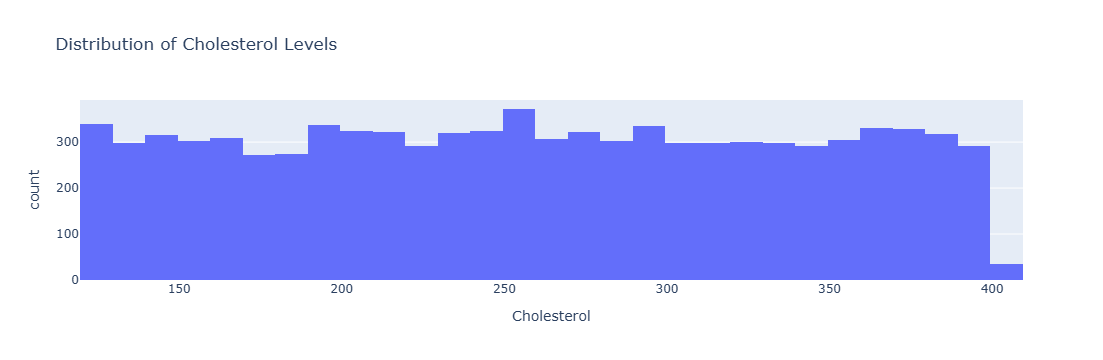

In [41]:
fig = px.histogram(CDHT_NEW, x="Cholesterol", nbins=50, title="Distribution of Cholesterol Levels")
fig.show()

##### 2.  Histogram For Age

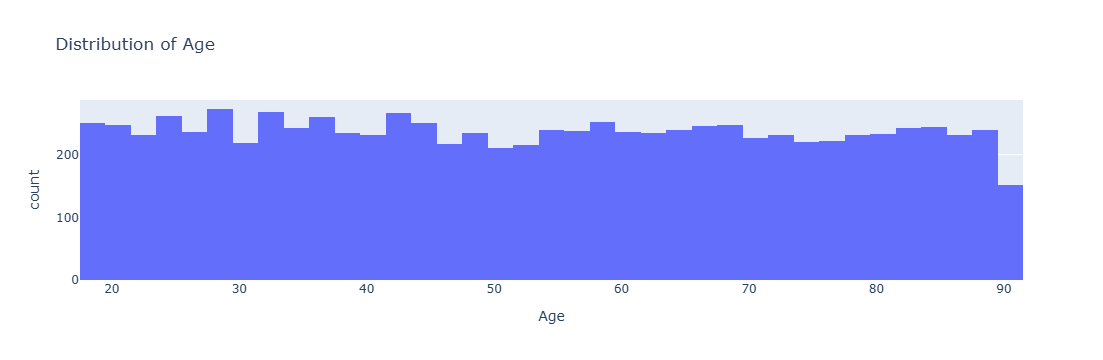

In [42]:
fig = px.histogram(CDHT_NEW, x="Age", nbins=50, title="Distribution of Age")
fig.show()

###### 3.Pie chart for HT (Hypertension)

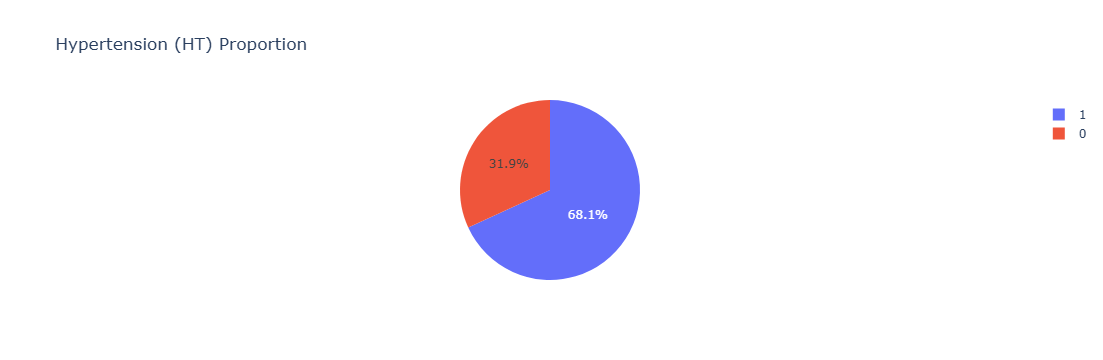

In [43]:
fig = px.pie(CDHT_NEW, names='HT', title='Hypertension (HT) Proportion')
fig.show()

###### 4. Scatter Plot for Cholesterol vs Systolic_BP

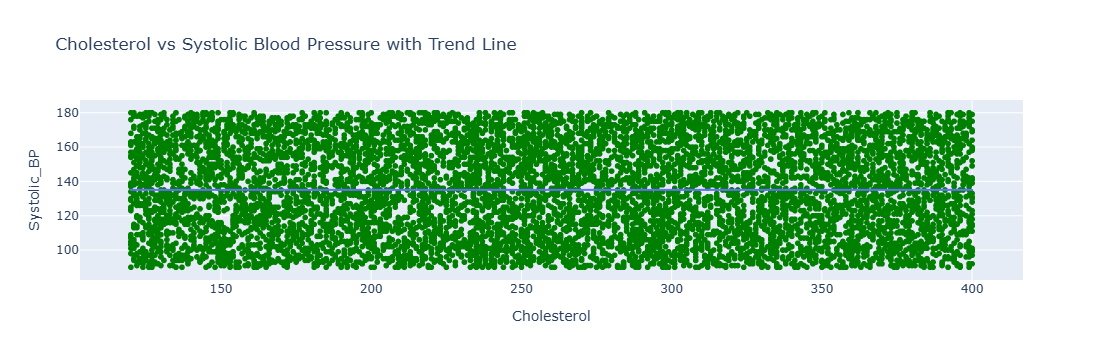

In [44]:
fig = px.scatter(CDHT_NEW, x="Cholesterol", y="Systolic_BP", title="Cholesterol vs Systolic Blood Pressure with Trend Line", trendline="ols")
fig.update_traces(marker=dict(color='green'), selector=dict(mode='markers')) 
fig.show()

###### 5. Age vs BMI

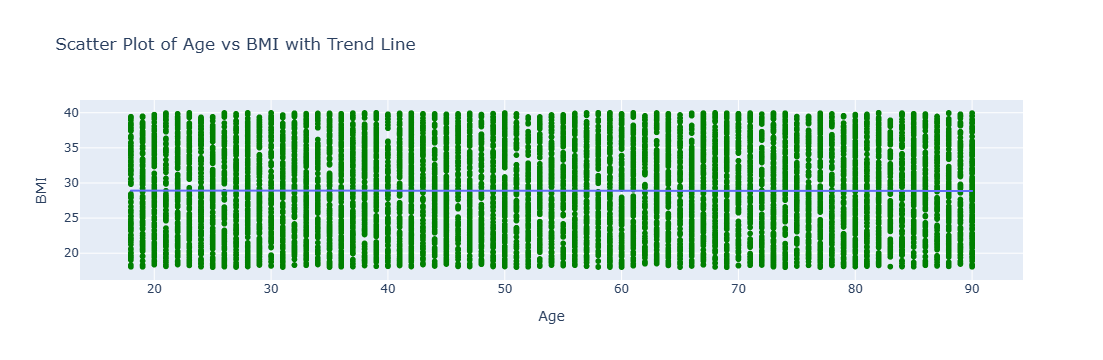

In [45]:
fig = px.scatter(CDHT_NEW, x="Age", y="BMI", title="Scatter Plot of Age vs BMI with Trend Line", trendline="ols")
fig.update_traces(marker=dict(color='green'), selector=dict(mode='markers')) 
fig.show()

##### 6. Corelation matrix 

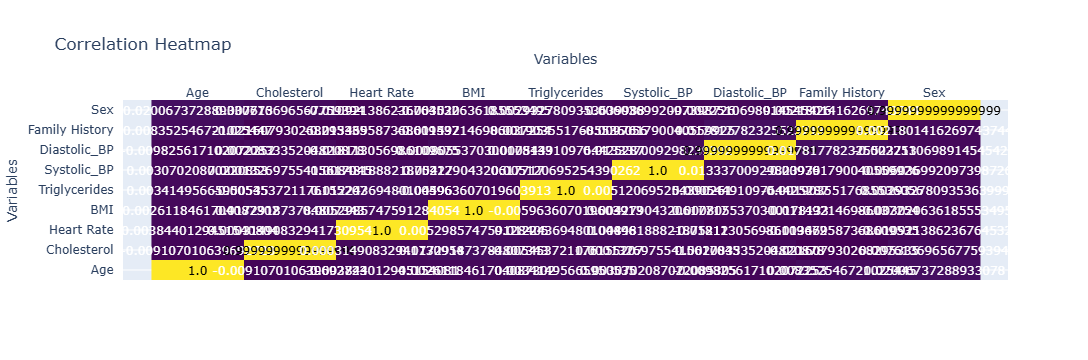

In [46]:
numeric_cols = ['Age', 'Cholesterol', 'Heart Rate', 'BMI', 'Triglycerides', 'Systolic_BP', 'Diastolic_BP','Family History','Sex']
corr_matrix = np.corrcoef(CDHT_NEW[numeric_cols].values.T)
fig = ff.create_annotated_heatmap(corr_matrix, x=numeric_cols, y=numeric_cols, colorscale="Viridis")
fig.update_layout(title="Correlation Heatmap", xaxis_title="Variables", yaxis_title="Variables")
fig.show()

## Data Splitting 

#### 1. Data Splitting For Cornory Artery Dieases

In [47]:
##Selecting useful columns for predictions for Cornory artery dieases it will help for data spliting 

In [48]:
useful_columns_cd = ['Age', 'Sex', 'Cholesterol', 'Systolic_BP', 'Diastolic_BP', 'Heart Rate', 'Diabetes', 
                     'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week',
                     'Previous Heart Problems', 'Medication Use', 'Stress Level', 'BMI', 'Triglycerides',
                     'Physical Activity Days Per Week']


In [49]:
##### Now we splitting a data for cornory artery dieases

In [50]:
X_cad = CDHT_NEW[useful_columns_cd]  # Features for CAD prediction
y_cad = CDHT_NEW['CD']  # Target for Coronary Artery Disease

In [51]:
#### After this we wiill train and test above splitting data

In [52]:
X_train_cad, X_test_cad, y_train_cad, y_test_cad = train_test_split(X_cad, y_cad, test_size=0.2, random_state=42)

In [53]:
print(f"CAD Training data shape: {X_train_cad.shape}, CAD Test data shape: {X_test_cad.shape}")

CAD Training data shape: (7010, 18), CAD Test data shape: (1753, 18)


#### 2. Data Splitting For Hypertension

In [54]:
useful_columns_ht=['Age', 'Sex', 'Cholesterol', 'Systolic_BP', 'Diastolic_BP', 'Heart Rate', 'Diabetes', 
                     'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week',
                     'Stress Level', 'BMI', 'Triglycerides', 'Blood_Pressure_Status']

In [55]:
##### Now we splitting a data for Hypertension

In [56]:
X_ht = CDHT_NEW[useful_columns_ht]  # Features for Hypertension prediction
y_ht = CDHT_NEW['HT']  # Target for Hypertension

In [57]:
#### After this we wiill train and test above splitting data

In [58]:
X_train_ht, X_test_ht, y_train_ht, y_test_ht = train_test_split(X_ht, y_ht, test_size=0.2, random_state=42)

In [59]:
print(f"HT Training data shape: {X_train_ht.shape}, HT Test data shape: {X_test_ht.shape}")

HT Training data shape: (7010, 16), HT Test data shape: (1753, 16)


### Statistical Test For Coronory Artery Diease

#### 1. ANOVA TEST FOR Continueues variables like age ,cholestrol,systolic_bp,,diastolic_bp,heart_rate,excersie hour per week,stress level etc

In [60]:
# Continuous variables for CD
continuous_cd = ['Age', 'Cholesterol', 'Systolic_BP', 'Diastolic_BP', 'Heart Rate', 
                 'Exercise Hours Per Week', 'Stress Level', 'BMI', 'Triglycerides', 
                 'Physical Activity Days Per Week']

In [61]:
# Function to perform ANOVA
def perform_anova(feature, target):
    groups = []
    for value in target.unique():
        group = feature[target == value]
        groups.append(group)
    return stats.f_oneway(*groups)

In [62]:
# Perform ANOVA for Coronary Artery Disease (CD)
print("\nANOVA Results for Coronary Artery Disease (CD):")
for column in continuous_cd:
    anova_result = perform_anova(CDHT_NEW[column], CDHT_NEW['CD'])
    print(f"{column}: p-value = {anova_result.pvalue:.5f}")


ANOVA Results for Coronary Artery Disease (CD):
Age: p-value = 0.26429
Cholesterol: p-value = 0.00000
Systolic_BP: p-value = 0.07386
Diastolic_BP: p-value = 0.04568
Heart Rate: p-value = 0.75510
Exercise Hours Per Week: p-value = 0.59868
Stress Level: p-value = 0.76535
BMI: p-value = 0.48432
Triglycerides: p-value = 0.44969
Physical Activity Days Per Week: p-value = 0.61010


#### 2. Chi_square test  for categorical variable like sex ,smoking,family history,and target variables like CD

In [63]:
# Categorical variables for CD
categorical_cd = ['Sex', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 
                  'Alcohol Consumption', 'Previous Heart Problems', 'Medication Use']

In [64]:
# Function to perform Chi-Square test
def perform_chi_square(cat_var, target):
    contingency_table = pd.crosstab(CDHT_NEW[cat_var], CDHT_NEW[target])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    return p

In [65]:
# Perform Chi-Square test for Coronary Artery Disease (CD)
print("\nChi-Square Test Results for Coronary Artery Disease (CD):")
for column in categorical_cd:
    p_value = perform_chi_square(column, 'CD')
    print(f"{column}: p-value = {p_value:.5f}")


Chi-Square Test Results for Coronary Artery Disease (CD):
Sex: p-value = 0.83168
Diabetes: p-value = 0.00000
Family History: p-value = 0.00000
Smoking: p-value = 0.41102
Obesity: p-value = 0.18709
Alcohol Consumption: p-value = 0.29766
Previous Heart Problems: p-value = 1.00000
Medication Use: p-value = 0.87037


### Statistical Test For HyperTension

 #### 1. ANOVA TEST for continues vaaiables that mention above

In [66]:
# Continuous variables for HT
continuous_ht = ['Age', 'Cholesterol', 'Systolic_BP', 'Diastolic_BP', 'Heart Rate', 
                 'Exercise Hours Per Week', 'Stress Level', 'BMI', 'Triglycerides']

In [67]:
# Function to perform ANOVA
def perform_anova(feature, target):
    groups = []
    for value in target.unique():
        group = feature[target == value]
        groups.append(group)
    return stats.f_oneway(*groups)

In [68]:
# Perform ANOVA for Hypertension (HT)
print("ANOVA Results for Hypertension (HT):")
for column in continuous_ht:
    anova_result = perform_anova(CDHT_NEW[column], CDHT_NEW['HT'])
    print(f"{column}: p-value = {anova_result.pvalue:.5f}")

ANOVA Results for Hypertension (HT):
Age: p-value = 0.14044
Cholesterol: p-value = 0.18737
Systolic_BP: p-value = 0.00000
Diastolic_BP: p-value = 0.00000
Heart Rate: p-value = 0.48535
Exercise Hours Per Week: p-value = 0.44298
Stress Level: p-value = 0.46768
BMI: p-value = 0.82564
Triglycerides: p-value = 0.60596


#### 2. Chi_square test for categorical variable like sex ,smoking,family history,and target variables like HT

In [69]:
# Categorical variables for HT
categorical_ht = ['Sex', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 
                  'Alcohol Consumption', 'Blood_Pressure_Status']

In [70]:
# Function to perform Chi-Square test
def perform_chi_square(cat_var, target):
    contingency_table = pd.crosstab(CDHT_NEW[cat_var], CDHT_NEW[target])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    return p

In [71]:
# Perform Chi-Square test for Hypertension (HT)
print("Chi-Square Test Results for Hypertension (HT):")
for column in categorical_ht:
    p_value = perform_chi_square(column, 'HT')
    print(f"{column}: p-value = {p_value:.5f}")

Chi-Square Test Results for Hypertension (HT):
Sex: p-value = 0.78525
Diabetes: p-value = 0.93523
Family History: p-value = 0.82202
Smoking: p-value = 0.67705
Obesity: p-value = 0.90810
Alcohol Consumption: p-value = 0.44461
Blood_Pressure_Status: p-value = 0.00000


### Correlation-Based Feature Selection for Hyper-Tension and Coronory artery Dieasece 

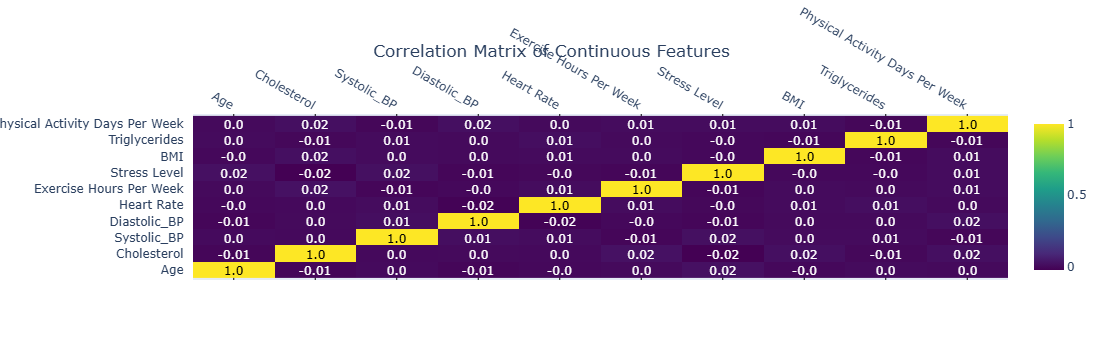

Highly correlated pairs of features (threshold > 0.8):


In [72]:
continuous_features = ['Age', 'Cholesterol', 'Systolic_BP', 'Diastolic_BP', 'Heart Rate', 
                       'Exercise Hours Per Week', 'Stress Level', 'BMI', 'Triglycerides', 
                       'Physical Activity Days Per Week']
corr_matrix = CDHT_NEW[continuous_features].corr()
# Plot the heatmap for visualization 
fig = ff.create_annotated_heatmap(
    z=corr_matrix.values,
    x=continuous_features,
    y=continuous_features,
    annotation_text=corr_matrix.round(2).values,
    colorscale='Viridis',
    showscale=True
)
fig.update_layout(title_text="Correlation Matrix of Continuous Features", title_x=0.5)
fig.show()
threshold = 0.8
correlated_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            correlated_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j]))
print("Highly correlated pairs of features (threshold > 0.8):")
for pair in correlated_pairs:
    print(pair)

####   Model Building 

In [73]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import BorderlineSMOTE

# Assuming you have already split the data into X_train_cad, X_test_cad, y_train_cad, y_test_cad
# and for HT: X_train_ht, X_test_ht, y_train_ht, y_test_ht

# Step 1: One-Hot Encoding for categorical features
# For CAD and HT, One-Hot Encode categorical features

# Combine train and test for consistency in encoding
X_cad_combined = pd.concat([X_train_cad, X_test_cad], axis=0)
X_ht_combined = pd.concat([X_train_ht, X_test_ht], axis=0)

# Perform One-Hot Encoding for CAD
X_cad_combined_encoded = pd.get_dummies(X_cad_combined, drop_first=True)

# Perform One-Hot Encoding for HT
X_ht_combined_encoded = pd.get_dummies(X_ht_combined, drop_first=True)

# Split the encoded combined dataset back into training and testing sets
X_train_cad_encoded = X_cad_combined_encoded.iloc[:X_train_cad.shape[0], :]
X_test_cad_encoded = X_cad_combined_encoded.iloc[X_train_cad.shape[0]:, :]

X_train_ht_encoded = X_ht_combined_encoded.iloc[:X_train_ht.shape[0], :]
X_test_ht_encoded = X_ht_combined_encoded.iloc[X_train_ht.shape[0]:, :]

# Step 2: Scale the continuous features
scaler = StandardScaler()

# Scale CAD data
X_train_cad_scaled = scaler.fit_transform(X_train_cad_encoded)
X_test_cad_scaled = scaler.transform(X_test_cad_encoded)

# Scale HT data
X_train_ht_scaled = scaler.fit_transform(X_train_ht_encoded)
X_test_ht_scaled = scaler.transform(X_test_ht_encoded)

# Step 3: Handle class imbalance with BorderlineSMOTE (if necessary)
smote = BorderlineSMOTE()

# Apply SMOTE on CAD data
X_train_cad_resampled, y_train_cad_resampled = smote.fit_resample(X_train_cad_scaled, y_train_cad)

# Apply SMOTE on HT data
X_train_ht_resampled, y_train_ht_resampled = smote.fit_resample(X_train_ht_scaled, y_train_ht)

# Step 4: Define classifiers
log_clf = LogisticRegression()
rf_clf = RandomForestClassifier()
svm_clf = SVC(probability=True)  # Enable probability for soft voting
knn_clf = KNeighborsClassifier()
gb_clf = GradientBoostingClassifier()

# Voting Classifier with soft voting for CAD
voting_clf_CAD = VotingClassifier(estimators=[
    ('lr', log_clf),
    ('rf', rf_clf),
    ('svm', svm_clf),
    ('knn', knn_clf),
    ('gb', gb_clf)
], voting='soft')

# Voting Classifier with soft voting for HT
voting_clf_HT = VotingClassifier(estimators=[
    ('lr', log_clf),
    ('rf', rf_clf),
    ('svm', svm_clf),
    ('knn', knn_clf),
    ('gb', gb_clf)
], voting='soft')

# Step 5: Train the ensemble model for CAD
voting_clf_CAD.fit(X_train_cad_resampled, y_train_cad_resampled)

# Train the ensemble model for HT
voting_clf_HT.fit(X_train_ht_resampled, y_train_ht_resampled)

# Step 6: Evaluate using cross-validation for CAD
scores_CAD = cross_val_score(voting_clf_CAD, X_train_cad_resampled, y_train_cad_resampled, cv=5, scoring='accuracy')
print(f'Cross-validated accuracy for CAD: {scores_CAD.mean():.2f}')

# Step 7: Evaluate using cross-validation for HT
scores_HT = cross_val_score(voting_clf_HT, X_train_ht_resampled, y_train_ht_resampled, cv=5, scoring='accuracy')
print(f'Cross-validated accuracy for HT: {scores_HT.mean():.2f}')

# Step 8: Evaluate on the test set for CAD
y_pred_cad = voting_clf_CAD.predict(X_test_cad_scaled)
print(f'Test accuracy for CAD: {accuracy_score(y_test_cad, y_pred_cad):.2f}')
print(classification_report(y_test_cad, y_pred_cad))
print(confusion_matrix(y_test_cad, y_pred_cad))

# Step 9: Evaluate on the test set for HT
y_pred_ht = voting_clf_HT.predict(X_test_ht_scaled)
print(f'Test accuracy for HT: {accuracy_score(y_test_ht, y_pred_ht):.2f}')
print(classification_report(y_test_ht, y_pred_ht))
print(confusion_matrix(y_test_ht, y_pred_ht))


Cross-validated accuracy for CAD: 1.00
Cross-validated accuracy for HT: 1.00
Test accuracy for CAD: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       117
           1       1.00      1.00      1.00      1636

    accuracy                           1.00      1753
   macro avg       1.00      1.00      1.00      1753
weighted avg       1.00      1.00      1.00      1753

[[ 117    0]
 [   0 1636]]
Test accuracy for HT: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       554
           1       1.00      1.00      1.00      1199

    accuracy                           1.00      1753
   macro avg       1.00      1.00      1.00      1753
weighted avg       1.00      1.00      1.00      1753

[[ 554    0]
 [   0 1199]]


####  So above model  is causing overfitting So in next we are  genrating synthtic data and usd for  model training 

##### Loadded New Synthetic data with 40,000 rows 

In [74]:
SCDHT=pd.read_csv('Synthetic CDHT.csv')

In [75]:
SCDHT.head(5)

Age  Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  Family History  \
0   76    0          325         94/109          80         1               1   
1   78    0          164         176/77          86         0               0   
2   78    1          124         176/77         105         1               0   
3   54    1          362         106/64         103         1               1   
4   65    0          372         176/77          45         1               0   

   Smoking  Obesity  Alcohol Consumption  ...        BMI  Triglycerides  \
0        0        1                    1  ...  30.947725             97   
1        1        0                    1  ...  32.691358             55   
2        1        1                    1  ...  18.453584            324   
3        1        0                    0  ...  29.302218            377   
4        1        0                    1  ...  35.033226            157   

   Physical Activity Days Per Week  Sleep Hours Per Day  Heart Attack Risk  \
0                                6                    7                  0   
1                                2                    4                  0   
2                                7                    4                  0   
3                                7                    7                  1   
4                                1                    7                  0   

   Systolic_BP  Diastolic_BP  HT  Blood_Pressure_Status  CD  
0          140            85   1                   High   1  
1          130            87   0                    Low   1  
2          126            81   1                   High   1  
3          112            93   1                   High   1  
4          125            74   0                    Low   1  

[5 rows x 26 columns]

In [76]:
SCDHT.tail(5)

Age  Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  \
39995   64    1          202         147/94          59         1   
39996   37    0          241        145/104          94         0   
39997   85    0          205        129/106          62         1   
39998   18    1          267         140/95         106         1   
39999   87    1          389         106/64         100         1   

       Family History  Smoking  Obesity  Alcohol Consumption  ...        BMI  \
39995               1        1        0                    1  ...  24.931584   
39996               1        1        1                    0  ...  37.622249   
39997               1        0        0                    1  ...  18.343970   
39998               0        1        1                    0  ...  34.900184   
39999               1        1        0                    1  ...  29.583540   

       Triglycerides  Physical Activity Days Per Week  Sleep Hours Per Day  \
39995            657                                2                   10   
39996            430                                2                    9   
39997            282                                3                    7   
39998            407                                0                   10   
39999            564                                3                    5   

       Heart Attack Risk  Systolic_BP  Diastolic_BP  HT  \
39995                  0          162            79   1   
39996                  0          103            67   1   
39997                  0          120            83   0   
39998                  1           91            84   0   
39999                  1          116            90   0   

       Blood_Pressure_Status  CD  
39995                   High   1  
39996                   High   1  
39997                    Low   1  
39998                    Low   1  
39999                    Low   1  

[5 rows x 26 columns]

In [77]:
SCDHT = SCDHT.drop(columns=['Blood Pressure'])

In [78]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
SCDHT['Blood_Pressure_Status'] = le.fit_transform(SCDHT['Blood_Pressure_Status'])


In [79]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Preprocess the Data (Encode categorical variables and scale the numerical features)

# Convert categorical variables (if necessary, like 'Sex' and 'Blood_Pressure_Status')
SCDHT_encoded = pd.get_dummies(SCDHT, drop_first=True)

# Separate features (X) and target (y) for both CD and HT
X_CD = SCDHT_encoded.drop(columns=['CD', 'HT'])
y_CD = SCDHT_encoded['CD']

X_HT = SCDHT_encoded.drop(columns=['CD', 'HT'])
y_HT = SCDHT_encoded['HT']

# Split data into train and test sets
X_train_CD, X_test_CD, y_train_CD, y_test_CD = train_test_split(X_CD, y_CD, test_size=0.2, random_state=42)
X_train_HT, X_test_HT, y_train_HT, y_test_HT = train_test_split(X_HT, y_HT, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()

X_train_CD_scaled = scaler.fit_transform(X_train_CD)
X_test_CD_scaled = scaler.transform(X_test_CD)

X_train_HT_scaled = scaler.fit_transform(X_train_HT)
X_test_HT_scaled = scaler.transform(X_test_HT)

# Step 2: Train the Voting Classifier (Ensemble of models)

# Define individual classifiers
log_clf = LogisticRegression()
rf_clf = RandomForestClassifier()
svm_clf = SVC(probability=True)
knn_clf = KNeighborsClassifier()
gb_clf = GradientBoostingClassifier()

# Voting classifier for CD
voting_clf_CD = VotingClassifier(estimators=[
    ('lr', log_clf),
    ('rf', rf_clf),
    ('svm', svm_clf),
    ('knn', knn_clf),
    ('gb', gb_clf)
], voting='soft')

# Voting classifier for HT
voting_clf_HT = VotingClassifier(estimators=[
    ('lr', log_clf),
    ('rf', rf_clf),
    ('svm', svm_clf),
    ('knn', knn_clf),
    ('gb', gb_clf)
], voting='soft')

# Train the model on CD
voting_clf_CD.fit(X_train_CD_scaled, y_train_CD)

# Train the model on HT
voting_clf_HT.fit(X_train_HT_scaled, y_train_HT)

# Step 3: Evaluate the model performance

# For CD
y_pred_CD = voting_clf_CD.predict(X_test_CD_scaled)
print(f'Test accuracy for CD: {accuracy_score(y_test_CD, y_pred_CD):.2f}')
print(classification_report(y_test_CD, y_pred_CD))
print(confusion_matrix(y_test_CD, y_pred_CD))

# For HT
y_pred_HT = voting_clf_HT.predict(X_test_HT_scaled)
print(f'Test accuracy for HT: {accuracy_score(y_test_HT, y_pred_HT):.2f}')
print(classification_report(y_test_HT, y_pred_HT))
print(confusion_matrix(y_test_HT, y_pred_HT))


Test accuracy for CD: 0.96
              precision    recall  f1-score   support

           0       0.52      0.12      0.20       349
           1       0.96      0.99      0.98      7651

    accuracy                           0.96      8000
   macro avg       0.74      0.56      0.59      8000
weighted avg       0.94      0.96      0.94      8000

[[  42  307]
 [  39 7612]]
Test accuracy for HT: 0.98
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      3973
           1       0.98      0.98      0.98      4027

    accuracy                           0.98      8000
   macro avg       0.98      0.98      0.98      8000
weighted avg       0.98      0.98      0.98      8000

[[3873  100]
 [  87 3940]]


In [80]:
# Training Accuracy for CD
y_train_pred_CD = voting_clf_CD.predict(X_train_CD_scaled)
train_accuracy_CD = accuracy_score(y_train_CD, y_train_pred_CD)
print(f'Training accuracy for CD: {train_accuracy_CD:.2f}')

# Testing Accuracy for CD
y_test_pred_CD = voting_clf_CD.predict(X_test_CD_scaled)
test_accuracy_CD = accuracy_score(y_test_CD, y_test_pred_CD)
print(f'Test accuracy for CD: {test_accuracy_CD:.2f}')

# Classification report and confusion matrix for CD (Test Data)
print("\nClassification report for CD (Test Data):")
print(classification_report(y_test_CD, y_test_pred_CD))
print("Confusion matrix for CD (Test Data):")
print(confusion_matrix(y_test_CD, y_test_pred_CD))

# For HT
# Training Accuracy for HT
y_train_pred_HT = voting_clf_HT.predict(X_train_HT_scaled)
train_accuracy_HT = accuracy_score(y_train_HT, y_train_pred_HT)
print(f'Training accuracy for HT: {train_accuracy_HT:.2f}')

# Testing Accuracy for HT
y_test_pred_HT = voting_clf_HT.predict(X_test_HT_scaled)
test_accuracy_HT = accuracy_score(y_test_HT, y_test_pred_HT)
print(f'Test accuracy for HT: {test_accuracy_HT:.2f}')

# Classification report and confusion matrix for HT (Test Data)
print("\nClassification report for HT (Test Data):")
print(classification_report(y_test_HT, y_test_pred_HT))
print("Confusion matrix for HT (Test Data):")
print(confusion_matrix(y_test_HT, y_test_pred_HT))

# Step 4: Compare training and testing accuracy

print("\nComparison of Training vs Testing Accuracy:")
print(f"CD - Training Accuracy: {train_accuracy_CD:.2f}, Test Accuracy: {test_accuracy_CD:.2f}")
print(f"HT - Training Accuracy: {train_accuracy_HT:.2f}, Test Accuracy: {test_accuracy_HT:.2f}")

Training accuracy for CD: 0.98
Test accuracy for CD: 0.96

Classification report for CD (Test Data):
              precision    recall  f1-score   support

           0       0.52      0.12      0.20       349
           1       0.96      0.99      0.98      7651

    accuracy                           0.96      8000
   macro avg       0.74      0.56      0.59      8000
weighted avg       0.94      0.96      0.94      8000

Confusion matrix for CD (Test Data):
[[  42  307]
 [  39 7612]]
Training accuracy for HT: 0.97
Test accuracy for HT: 0.98

Classification report for HT (Test Data):
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      3973
           1       0.98      0.98      0.98      4027

    accuracy                           0.98      8000
   macro avg       0.98      0.98      0.98      8000
weighted avg       0.98      0.98      0.98      8000

Confusion matrix for HT (Test Data):
[[3873  100]
 [  87 3940]]

Comparison of T

#### So above model  specially for cd showing that the model is biased towards cd=1 and not cd=0  however ht model perform well on both 

##### So in next we  do some changes like using Balanced Random Forest then do cross validation on that model after that  compare training and testing accuracy thne do  hyperparameter tuning with randomized search  then again compare training and testing accuracy for both model if accuracy get balanced stop and make pkl file 